# Question1: Plot the Graph and Make Predictions

In [3]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf

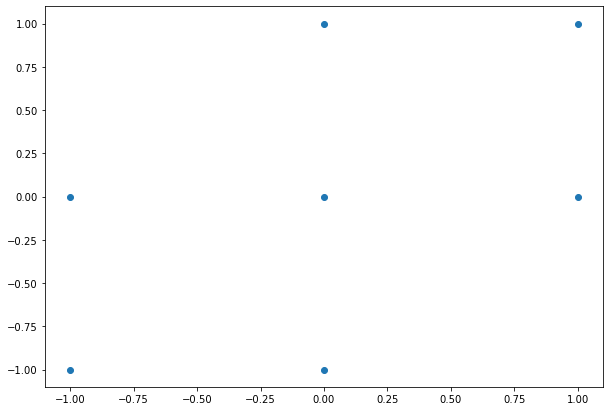

In [4]:
# (−1,−1), (−1, 0), (0,−1), (0, 0), (0, 1), (1, 0), (1, 1)
X = [-1, -1, 0, 0, 0, 1, 1]
y = [-1, 0, -1, 0, 1, 0, 1]

# plot data points
fig, ax = plt.subplots(figsize =(10, 7))
ax.scatter(X, y)
plt.savefig("seven_data_point")

I think the result of fitting a linear model to this dataset would be y = 0.5x (slope: 0.5; intercept: 0). From my observation, I think this is the line yielding a small MSE as the distance to the line is minimized overall.

# Question2: LMS

I implemented the Least Mean Squares (LMS) with gradient descent algorithm. Details can be found here: https://github.com/kuleshov/cornell-cs5785-2021-applied-ml/blob/main/notebooks/lecture3-linear-regression.ipynb 

In [5]:
#The linear model we are trying to fit
def f(X, theta):
    """The linear model we are trying to fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix
    
    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return np.dot(X,theta)

#Define mean squared error
def mean_squared_error(theta, X, y):
    """The cost function, J, describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return 0.5*np.mean((y-f(X, theta))**2)

#Define the gradient of cost function
def mse_gradient(theta, X, y):
    """The gradient of the cost function.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X, theta) - y) * X.T, axis=1)

In [6]:
# input
X = np.array([[-1], [-1],[0], [0], [0], [1], [1]])
y = np.array([-1, 0, -1, 0, 1, 0, 1])
X.shape, y.shape

((7, 1), (7,))

In [7]:
# using Widrow-Hoff learning rule to train our linear model with gradient descent algorithm
threshold = 1e-7
step_size = 4e-1
theta, theta_prev = np.array([10]), np.array([1])
opt_pts = [theta]
opt_grads = []
iter = 0

while np.linalg.norm(theta - theta_prev) > threshold:
    theta_prev = theta
    gradient = mse_gradient(theta, X, y)
    # θk+1=θk−α∇θJ(θ)k
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1
    
print(opt_pts[-1])

[0.50000027]


In [8]:
print("Slope: {}".format(opt_pts[-1]))

Slope: [0.50000027]


Intecept: 0.0


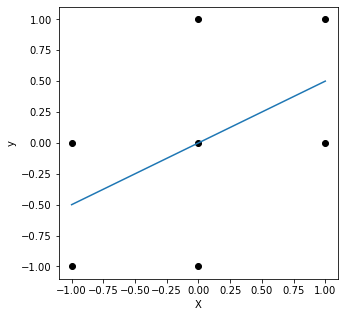

In [9]:
x_line = np.stack([np.linspace(-1, 1, 3)])
y_line = opt_pts[-1].dot(x_line)

# plot data points
fig, ax = plt.subplots(figsize =(5, 5))
ax.scatter(X, y,  color='black')
ax.plot(x_line[0], y_line)
plt.xlabel('X')
plt.ylabel('y')
plt.savefig("seven_data_point_mse")

print("Intecept: {}".format(y_line[1]))

The slope obtained from MSE method is 0.50000027, and intecept is 0. It's close to my prediction in part a).